In [2]:
# Basic tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots nicely in Jupyter
%matplotlib inline
sns.set(style="whitegrid")


In [4]:
# Load the CSV file
df = pd.read_csv("heart_disease_uci.csv")

# Show the first 5 rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Shape of the dataset
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")

# Column names
print("Column names:", df.columns.tolist())

# Info about each column
df.info()

# Summary statistics
df.describe()


Dataset contains 920 rows and 16 columns.
Column names: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
d

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
# Count missing values per column
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [17]:
print(df.columns)



Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [19]:
# If 'num' is the target column, convert it to binary and rename to 'target'
if 'num' in df.columns:
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [21]:
print(df[['num', 'target']].head())  # Check both old and new target columns



   num  target
0    0       0
1    2       1
2    1       1
3    0       0
4    0       0


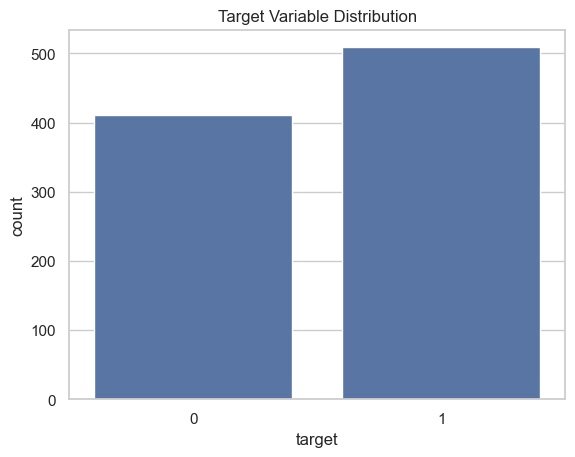

In [23]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()


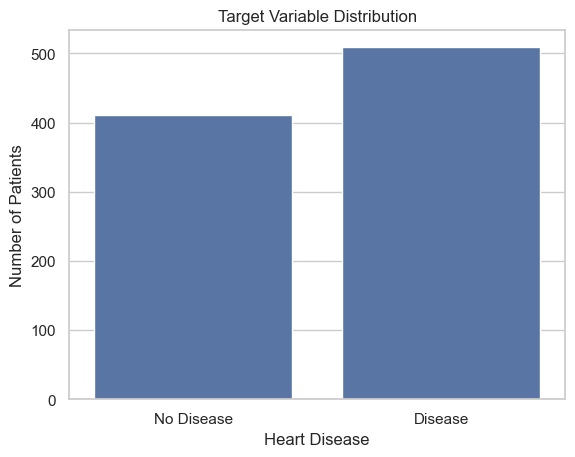

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


In [27]:
# Example: Chest pain type vs. target
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')


Text(0.5, 1.0, 'Chest Pain Type vs. Heart Disease')

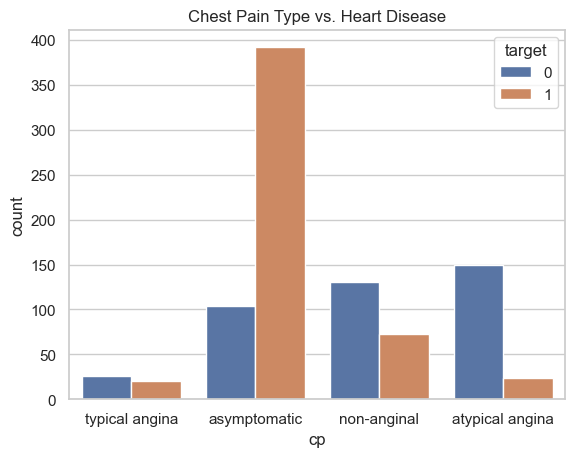

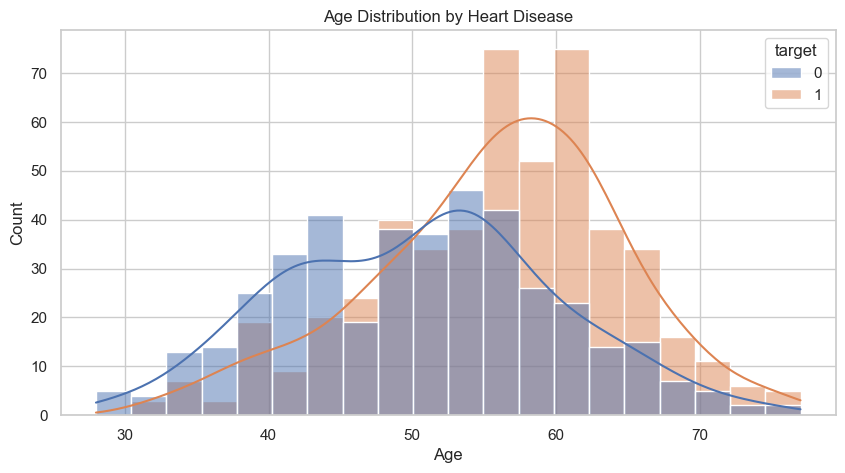

In [29]:
#Age Distribution by Target
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


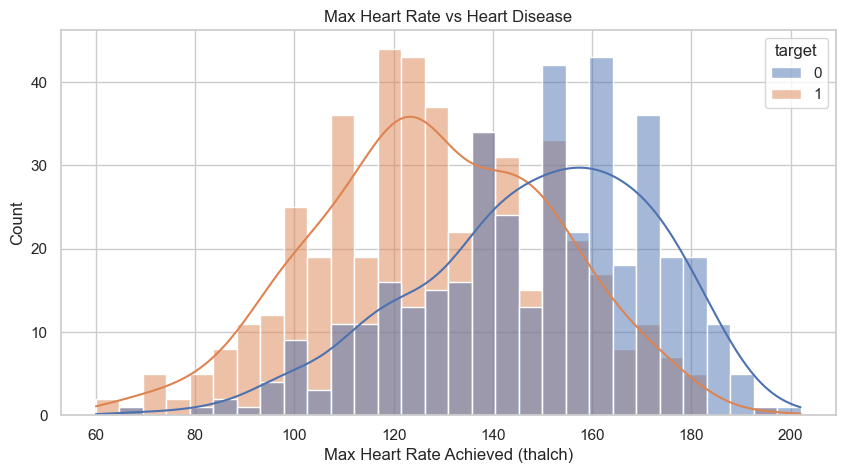

In [31]:
#Maximum Heart Rate (thalach) vs Target
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='thalch', hue='target', bins=30, kde=True)
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Max Heart Rate Achieved (thalch)')
plt.ylabel('Count')
plt.show()


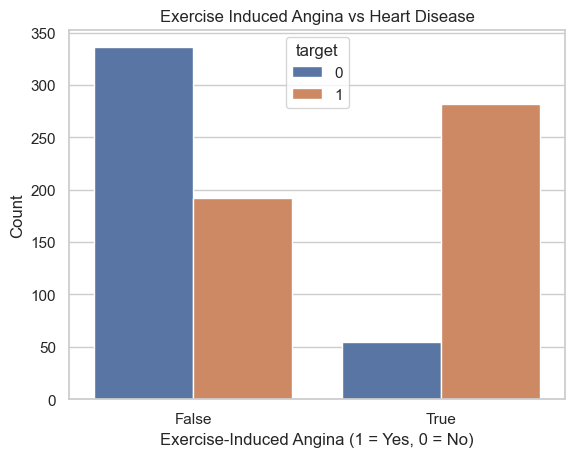

In [33]:
#Exercise-Induced Angina (exang) vs Target
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


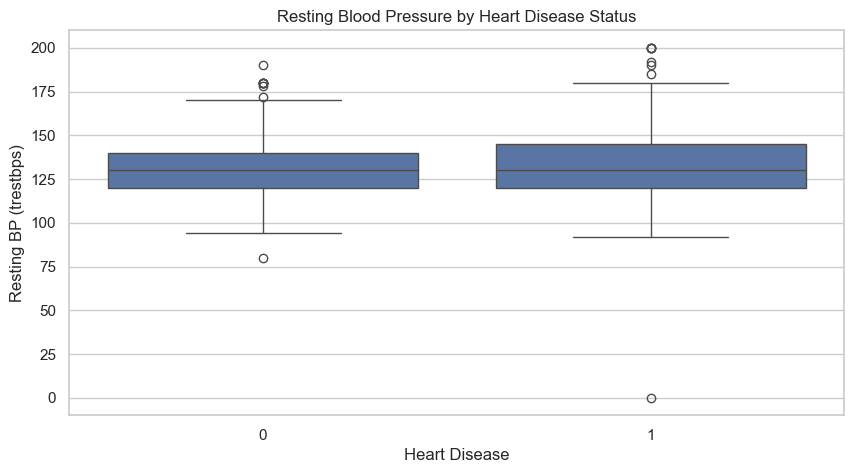

In [35]:
#Resting Blood Pressure (trestbps) Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Resting BP (trestbps)')
plt.show()


In [43]:
# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']


In [49]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (920, 16)
y shape: (920,)


In [39]:
# One-hot encode selected categorical features
X = pd.get_dummies(X, columns=['cp', 'restecg'], drop_first=True)


In [51]:
print(X.columns)


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [53]:
print("Shape after encoding:", X.shape)


Shape after encoding: (920, 16)


In [55]:
#View Encoded Columns
X.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.007386,Male,Cleveland,typical angina,0.675287,0.305908,True,lv hypertrophy,0.480653,False,1.303159,downsloping,0.0,fixed defect,0
1,2,1.432034,Male,Cleveland,asymptomatic,1.462483,0.784599,False,lv hypertrophy,-1.140262,True,0.569611,flat,3.0,normal,2
2,3,1.432034,Male,Cleveland,asymptomatic,-0.636705,0.269780,False,lv hypertrophy,-0.329805,True,1.578239,flat,2.0,reversable defect,1
3,4,-1.752828,Male,Cleveland,non-anginal,-0.111908,0.459450,False,normal,1.908602,False,2.403480,downsloping,0.0,normal,0
4,5,-1.328180,Female,Cleveland,atypical angina,-0.111908,0.043982,False,lv hypertrophy,1.329704,False,0.477918,upsloping,0.0,normal,0


In [47]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
X[num_cols] = scaler.fit_transform(X[num_cols])


In [57]:
#Preview the Scaled Data
X.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.007386,Male,Cleveland,typical angina,0.675287,0.305908,True,lv hypertrophy,0.480653,False,1.303159,downsloping,0.0,fixed defect,0
1,2,1.432034,Male,Cleveland,asymptomatic,1.462483,0.784599,False,lv hypertrophy,-1.140262,True,0.569611,flat,3.0,normal,2
2,3,1.432034,Male,Cleveland,asymptomatic,-0.636705,0.269780,False,lv hypertrophy,-0.329805,True,1.578239,flat,2.0,reversable defect,1
3,4,-1.752828,Male,Cleveland,non-anginal,-0.111908,0.459450,False,normal,1.908602,False,2.403480,downsloping,0.0,normal,0
4,5,-1.328180,Female,Cleveland,atypical angina,-0.111908,0.043982,False,lv hypertrophy,1.329704,False,0.477918,upsloping,0.0,normal,0


In [59]:
# Check Mean and Standard Deviation
X[num_cols].describe().round(2)


,age,trestbps,chol,thalch,oldpeak
count,920.00,861.00,890.00,865.00,858.00
mean,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.71,-6.93,-1.80,-2.99,-3.19
25%,-0.69,-0.64,-0.22,-0.68,-0.81
50%,0.05,-0.11,0.22,0.09,-0.35
75%,0.69,0.41,0.62,0.75,0.57
max,2.49,3.56,3.65,2.49,4.88


In [61]:
#Print the Shape to Ensure Consistency
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (920, 16)
y shape: (920,)


In [63]:
# Fill any remaining missing numeric values with median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())


In [65]:
#checking if there is any missing values
X[num_cols].isnull().sum()


age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64

In [69]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())

X_train shape: (736, 16)
X_test shape: (184, 16)
y_train value counts:
 target
1    407
0    329
Name: count, dtype: int64


In [79]:
X.dtypes


id            int64
age         float64
sex           int64
dataset      object
cp           object
trestbps    float64
chol        float64
fbs         float64
restecg      object
thalch      float64
exang       float64
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [81]:
 #Drop Unused Columns (Again)
X = X.drop(columns=['id', 'dataset', 'num', 'ca', 'slope', 'thal'], errors='ignore')


In [83]:
#One-Hot Encode Remaining Categorical Columns
X = pd.get_dummies(X, columns=['cp', 'restecg'], drop_first=True)


In [85]:
print(X.dtypes)

age                         float64
sex                           int64
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
dtype: object


In [87]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [95]:
X.isnull().sum()


age                           0
sex                           0
trestbps                      0
chol                          0
fbs                         920
thalch                        0
exang                       920
oldpeak                       0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
restecg_normal                0
restecg_st-t abnormality      0
dtype: int64

In [97]:
X = X.drop(columns=['fbs', 'exang'])


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [101]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [103]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


✅ Logistic Regression Evaluation
Accuracy: 0.7934782608695652
Confusion Matrix:
 [[57 25]
 [13 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        82
           1       0.78      0.87      0.82       102

    accuracy                           0.79       184
   macro avg       0.80      0.78      0.79       184
weighted avg       0.80      0.79      0.79       184



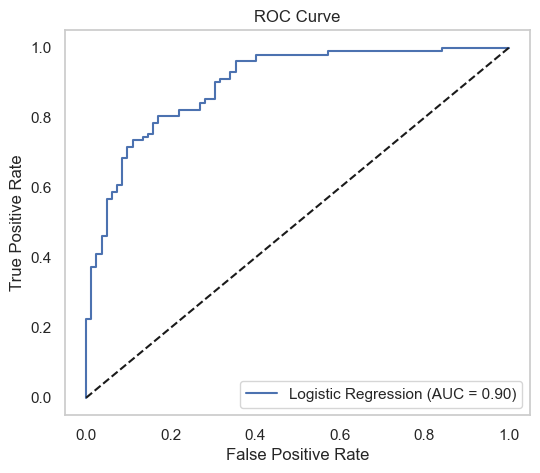

In [105]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [107]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)


In [109]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(" Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


✅ Random Forest Evaluation
Accuracy: 0.8369565217391305
Confusion Matrix:
 [[59 23]
 [ 7 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80        82
           1       0.81      0.93      0.86       102

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.83       184
weighted avg       0.84      0.84      0.83       184



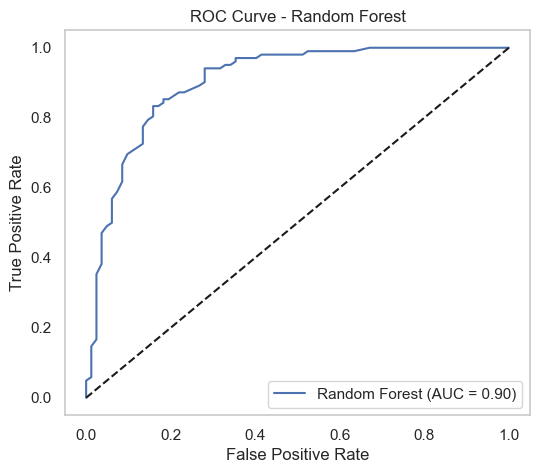

In [111]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()
